In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.style as style
import folium
import PIL
import itertools
import matplotlib.style as style
import parser as parser
from datetime import datetime, date, time, timedelta
import datetime as dt # Para las variables de tiempo
from seaborn import categorical
import squarify
from math import pi
from io import StringIO

In [2]:
f = lambda s: datetime.datetime.strptime(s,'%d-%m-%Y-%H-%M-%S')

In [3]:
df = pd.read_csv('BBDD_Sn.csv', sep=';', low_memory = False, date_parser = f,encoding='utf-8-sig')

In [4]:
df.head(5)

,ID,Site_Offer,Conversion_label,Conversion_date_hour
0,-,evobanco.com,1_Email_movil,31/01/2019 23:59
1,-,Kelisto_Aff,1_Email_movil,31/01/2019 23:59
2,-,Kelisto_Aff,1_Email_movil,31/01/2019 23:58
3,-,evobanco.com,1_Email_movil,31/01/2019 23:58
4,-,Kelisto_Aff,1_Email_movil,31/01/2019 23:57


Cantidad de leads en relación a ID

In [5]:
personas = df.ID.value_counts()
personas

-               371300
IDE-02398752       113
IDE-02399421        95
IDE-02398615        92
IDE-00029238        90
IDE-02354905        85
IDE-02398790        82
IDE-02346202        80
IDE-02367097        80
IDE-02399676        73
IDE-02398323        73
IDE-02413034        72
IDE-02345961        71
IDE-02397702        68
IDE-02406664        66
IDE-02381032        66
IDE-02399417        66
IDE-00018627        66
IDE-02384980        63
IDE-02406543        61
IDE-02366897        61
IDE-02383578        60
IDE-02423855        59
IDE-02399602        58
IDE-02397463        58
IDE-02385546        58
IDE-02379688        57
IDE-02412909        57
IDE-02353603        56
IDE-02404298        55
                 ...  
IDE-02386271         1
IDE-02384826         1
IDE-02382581         1
IDE-02398056         1
IDE-02423814         1
IDE-02406427         1
IDE-02412614         1
IDE-02398698         1
IDE-02406556         1
IDE-02384586         1
IDE-02384705         1
IDE-02382718         1
IDE-0005824

In [6]:
IDporSite = df[['Site_Offer', 'ID']]
IPS = IDporSite.groupby('ID')['Site_Offer'].count().sort_values(ascending = False).reset_index()

IPS.head(10).ID.values

array(['-', 'IDE-02398752', 'IDE-02399421', 'IDE-02398615',
       'IDE-00029238', 'IDE-02354905', 'IDE-02398790', 'IDE-02346202',
       'IDE-02367097', 'IDE-02399676'], dtype=object)

20 personas con mascantidad de Site

In [7]:
PersonasConMasSite = np.array(IPS.head(20).ID.values)
pasos = df[df['ID'].isin(PersonasConMasSite)]
pasos = pd.crosstab(pasos.ID , pasos.Site_Offer)
pasos

Site_Offer,-,Direct access,EVO,EVOBanco_Google_Adwords_GDN,EVOBanco_Google_Adwords_SEM,Inmocrowd,Kelisto_Aff,Kelisto_DMK,Kelisto__,LleidaNet,Nurturing SMS,Rankia_Aff,Rankia__,Rastreator_Aff,Weborama,appspot.com,evobanco.com,evobanco.es,yandex.ru
ID,,,,,,,,,,,,,,,,,,,
-,6239,90,2138,1688,16237,2,238571,1,3,2387,62,525,487,52,4,1190,101467,154,3
IDE-00018627,0,0,0,48,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0
IDE-00029238,0,0,0,22,0,0,68,0,0,0,0,0,0,0,0,0,0,0,0
IDE-02345961,0,0,0,0,0,0,66,0,0,0,0,0,0,0,0,0,5,0,0
IDE-02346202,0,0,0,0,0,0,78,0,0,2,0,0,0,0,0,0,0,0,0
IDE-02354905,0,0,46,0,0,0,34,0,0,4,0,1,0,0,0,0,0,0,0
IDE-02367097,0,0,0,31,1,0,48,0,0,0,0,0,0,0,0,0,0,0,0
IDE-02381032,0,0,0,0,1,0,65,0,0,0,0,0,0,0,0,0,0,0,0
IDE-02384980,0,0,0,0,0,0,63,0,0,0,0,0,0,0,0,0,0,0,0


- 1º Se define una funcion que hace un plot recibiendo etiquetas, las estadisticas de las columnas y el titulo del plot
- 2º Se establece el ángulo de las coordenadadas polares. Y se usa el np.concatenate para dibujar un recinto cerrado para el radar chart
- 3º Se crea una figura
- 4º Se define metricas de la figura y se dibuja el plot
- 5º Se grafica el área de las estadisticas
- 6º Se grafica las etiquetas
- 7º Se define una orientacion diagonal para las etiquetas en grados
- 8º Se convierte a radianes
- 9º Se redibuja la figura
- 10º Se suma pi al angulo de cada etiqueta si el coseno da negativo(invierte el sentido de la palabra)
- 11º Se pasa radianes a grados
- 12º Se itera sobre dos listas en paralelo: angulos y etiquetas
- 13º Se obtiene la posicion en x,y de cada etiqueta 
- 14º Se obtiene la etiqueta y se le aplica una transformacion, y se cambia la distancia hacia el chart
- 15º Se rota la etiqueta el angulo obtenido en angles
- 16º Se elimina las etiquetas por defecto del chart
- 17º Se aplica la funcion para cada ID

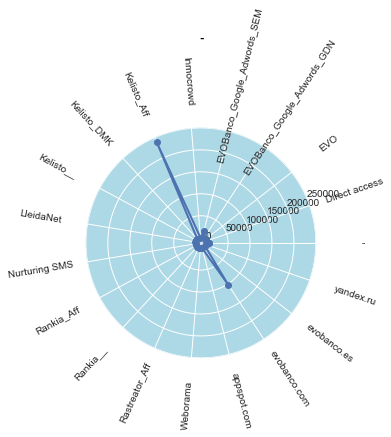

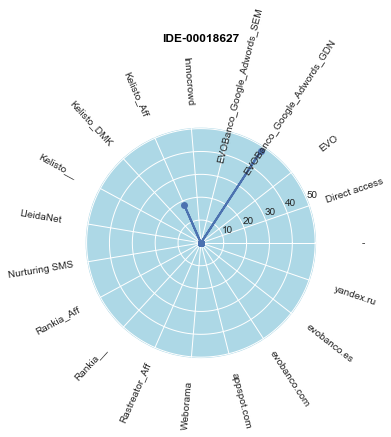

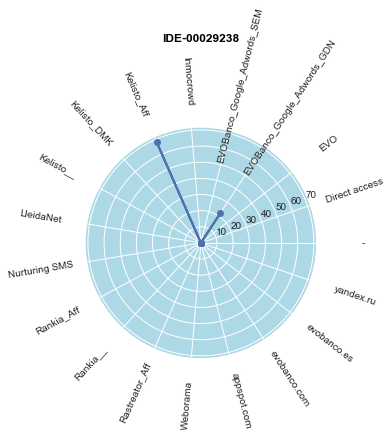

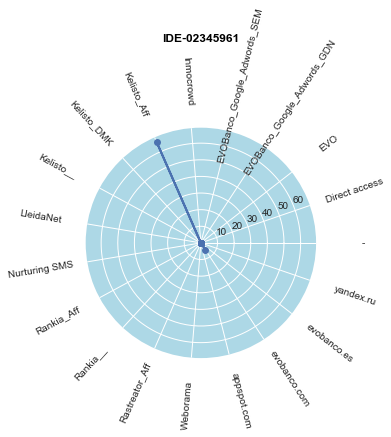

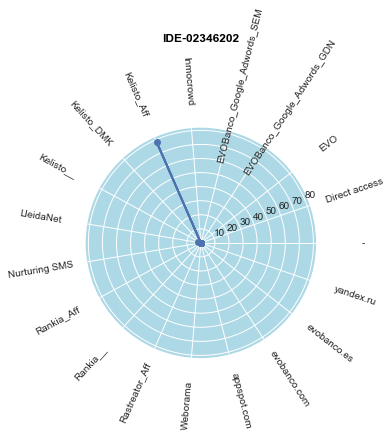

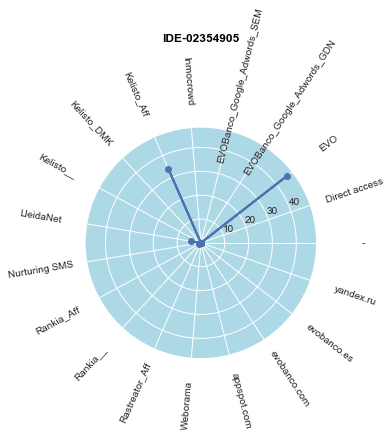

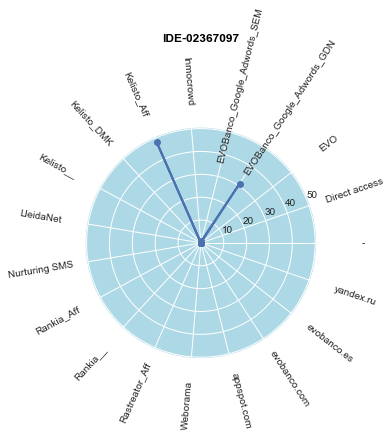

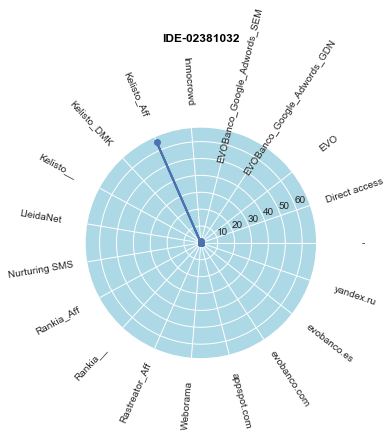

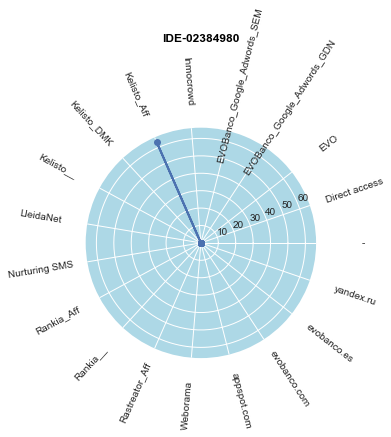

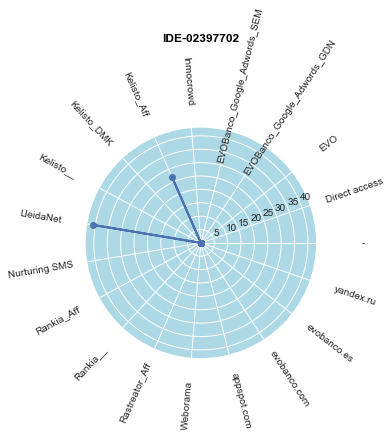

In [10]:
#1º
def hacerRadarChart(labels, stats, ID):
    #2º
    angles = np.linspace(0,2*np.pi,len(labels), endpoint=False)
     
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    #3º
    fig= plt.figure(figsize=(4,4))

    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection='polar', facecolor='lightblue')

    fig.text(0.5, 1.20, ID,
             horizontalalignment='center', color='black', weight='bold', size='large')
     #4º
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.set_rmax(1)
    #5º
    ax.fill(angles, stats, alpha=0.25)
    #6º
    ax.set_thetagrids(angles * 180/np.pi, labels)
    #7º
    ticks= np.linspace(0,360,20)[:-1] 
    #8º
    ax.set_xticks(np.deg2rad(ticks))
    #9º
    plt.gcf().canvas.draw_idle()
    #10º
    angles[np.cos(angles) < 0] = angles[np.cos(angles) < 0] + np.pi
     #11º
    angles = np.rad2deg(angles)
    #12º
    for label, angle in zip(ax.get_xticklabels(), angles):
        #13º
        x,y = label.get_position()
        #14º
        lab = ax.text(x,y-0.29, label.get_text(), transform=label.get_transform(),
                      ha=label.get_ha(), va=label.get_va())
        #15º
        lab.set_rotation(angle)
        #16º
    ax.set_xticklabels([])

    ax.grid(True)
    #17º

for x in range(0, 10):
    stats = np.array(pd.to_numeric(pasos.reset_index().iloc[x,1:20].values))
    ID = pasos.reset_index().iloc[x,0]
    hacerRadarChart(labels= np.array(pasos.columns), stats=stats, ID = ID)





Se obtienen la cantidad de pasos por canal

In [11]:
df_by_canal = df.groupby(['Site_Offer'])['Conversion_label'].agg(['count'])
df_by_canal = df_by_canal.sort_values(by= 'count', ascending = False).reset_index()
df_by_canal.head(17)

,Site_Offer,count
0,Kelisto_Aff,273447
1,evobanco.com,120637
2,EVOBanco_Google_Adwords_SEM,20229
3,-,6392
4,LleidaNet,5454
5,EVO,2695
6,EVOBanco_Google_Adwords_GDN,2289
7,appspot.com,1190
8,Rankia_Aff,621
9,Rankia__,564


Para los que tienen pocos lead y no descuadre los junto todos en una categoria

In [12]:
df_by_canal.sort_values(by = 'count', ascending = True).head(19)

,Site_Offer,count
18,Kelisto_DMK,1
17,Inmocrowd,2
16,yandex.ru,3
15,Weborama,4
14,Kelisto__,4
13,Nurturing SMS,65
12,Rastreator_Aff,77
11,Direct access,99
10,evobanco.es,156
9,Rankia__,564


La columna new_channel contiene el valor other,es decie aquellos que contengan un porcentaje inferior al 0.5%

In [13]:
total_lead = df['Site_Offer'].count()

df_by_canal['porcentaje'] = df_by_canal['count'].apply(lambda count: count / total_lead * 100)
df_by_canal['new_channel'] = df_by_canal.apply(lambda row: 'Other' if row['porcentaje'] < 0.5 else row['Site_Offer'], axis = 1)

In [14]:
df_by_canal.head(19)

,Site_Offer,count,porcentaje,new_channel
0,Kelisto_Aff,273447,63.016530,Kelisto_Aff
1,evobanco.com,120637,27.801092,evobanco.com
2,EVOBanco_Google_Adwords_SEM,20229,4.661823,EVOBanco_Google_Adwords_SEM
3,-,6392,1.473052,-
4,LleidaNet,5454,1.256888,LleidaNet
5,EVO,2695,0.621069,EVO
6,EVOBanco_Google_Adwords_GDN,2289,0.527506,EVOBanco_Google_Adwords_GDN
7,appspot.com,1190,0.274238,Other
8,Rankia_Aff,621,0.143111,Other
9,Rankia__,564,0.129975,Other


Se agrupan las conversiones por mes

In [15]:
df['Conversion_date_hour_datetime'] = pd.to_datetime(df['Conversion_date_hour'])

In [16]:
df['Conversion_date_hour_month'] = df['Conversion_date_hour_datetime'].apply(lambda Conversion_date_hour_datetime: Conversion_date_hour_datetime.strftime("%Y-%m") if pd.notnull(Conversion_date_hour_datetime) else Conversion_date_hour_datetime)
df_by_month = df.groupby(['Conversion_date_hour_month'])['ID'].agg(['count']).reset_index()
df_by_month.head(4)

,Conversion_date_hour_month,count
0,2018-01,10689
1,2018-02,10573
2,2018-03,11820
3,2018-04,10533


[]

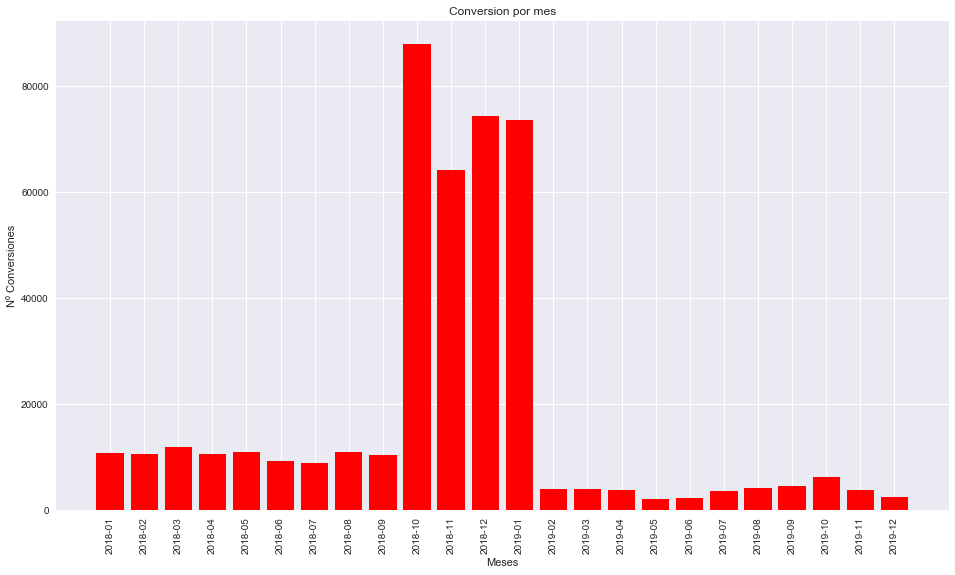

In [17]:
x = df_by_month['Conversion_date_hour_month']
y = df_by_month['count']

fig, ax =  plt.subplots(figsize=(16, 9))

ax.bar(x, y, color = 'red')
ax.set_title('Conversion por mes')
ax.set_xlabel('Meses')
ax.set_ylabel('Nº Conversiones')

plt.xticks(rotation = 90)
plt.plot()

Cambio el formato de la columna 'Conversion_date_hour'

In [157]:
df['Conversion_date_hour'] = pd.to_datetime(df['Conversion_date_hour'], errors='raise', box = True)

Se filtra la variedad de canales

In [158]:
canales = df['Site_Offer'].value_counts()

Se realiza un grafico de barras de la cantidad de canales

Text(0,0.5,'Cantidad por canal')

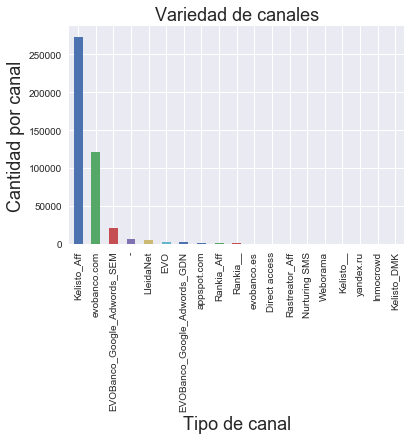

In [159]:
canales.plot(kind='bar')
plt.title('Variedad de canales', fontsize = 18)
plt.xlabel('Tipo de canal', fontsize = 18)
plt.ylabel('Cantidad por canal', fontsize = 18)

Se saca la cantidad de pasos que realizan los cliente por lead

In [160]:
canalesXlead = df[['Site_Offer','Conversion_label']].dropna()

In [161]:
canalesXleads = canalesXlead[(canalesXlead['Conversion_label'] != 'Unknown') & (canalesXlead['Site_Offer'])]

In [162]:
df2 = (canalesXleads.groupby('Conversion_label')['Site_Offer'].agg({'Site_Offer' : 'count'}))
df2

C:\Users\Jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,Site_Offer
Conversion_label,
0.WELCOME,17
12_Identificacion_iban,7224
13_Identificacion_iban_fotos,354
14_Fin_proceso,3552
15_Descarga_documentacion,4532
16_ContratacionOK,3126
1_Email_movil,366598
2_Confirmacion_OTP,2015
3_Datos_personales,14166


In [163]:
df3 = df2.reset_index()

df3["Site_Offer_log"] = np.log(df3["Site_Offer"]+1)

Text(0,0.5,'Pasos')

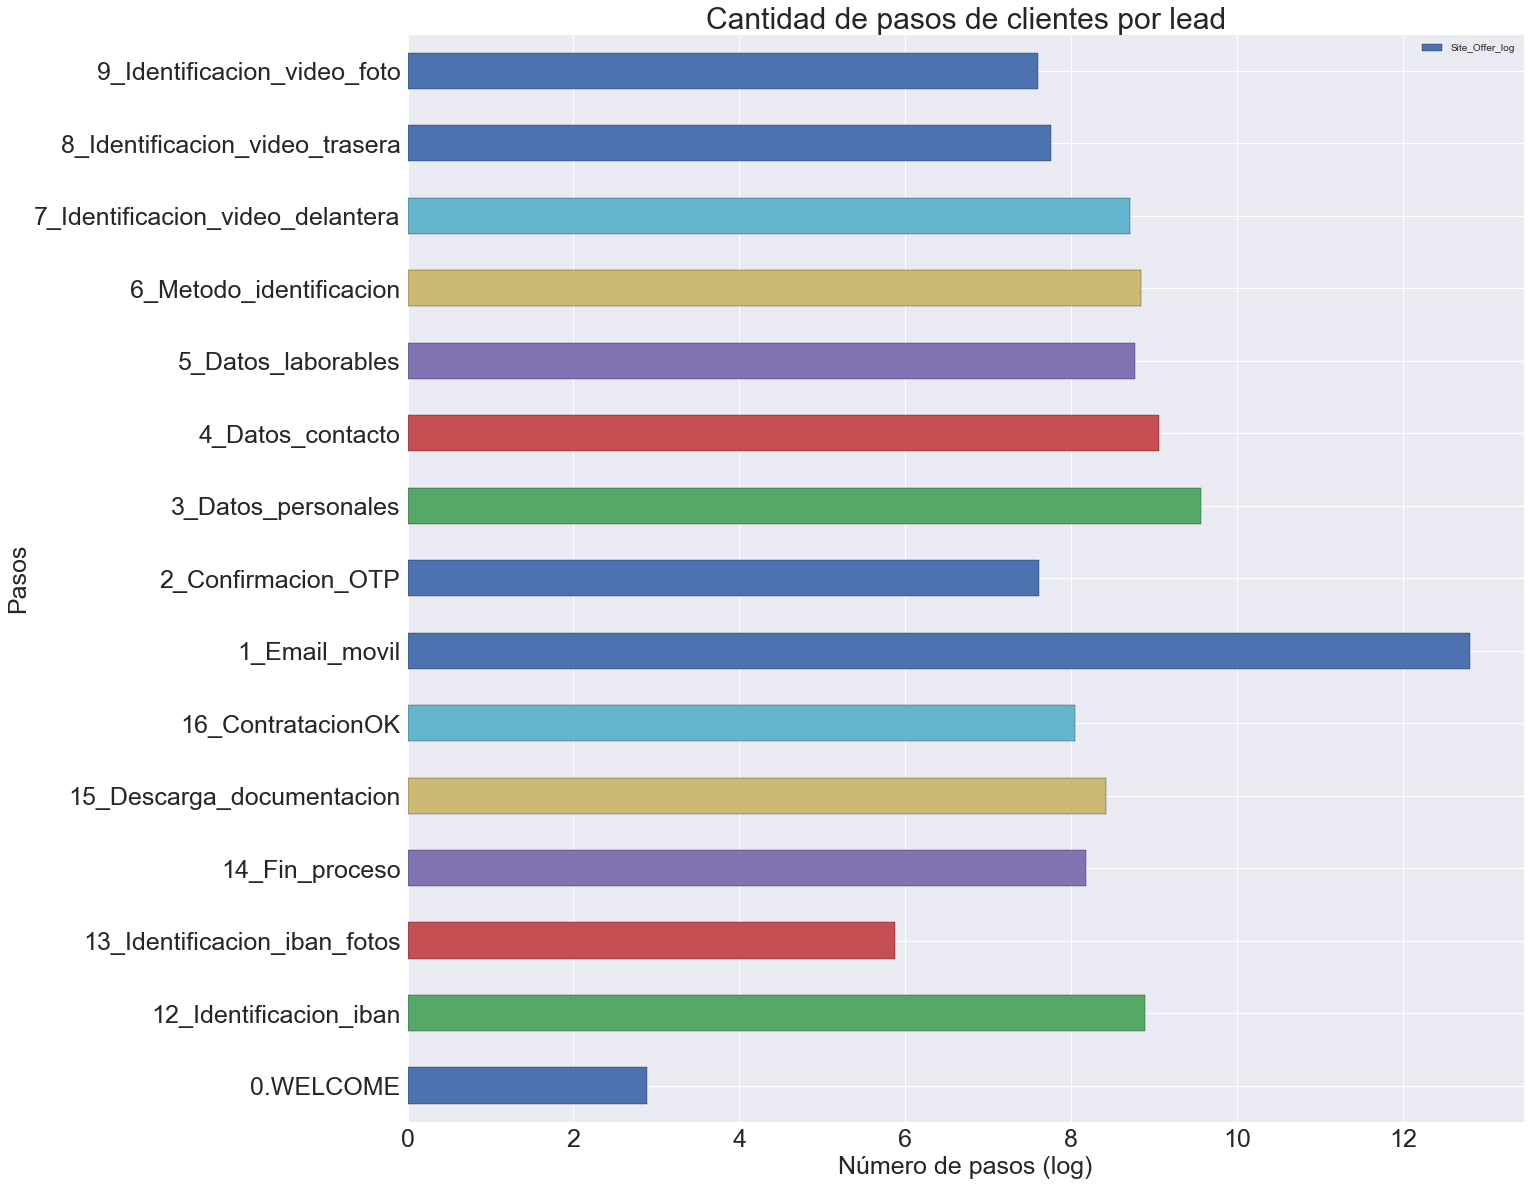

In [164]:
# Ploteo la cantidad de canales por lead
g = df3.plot.barh(x='Conversion_label', y='Site_Offer_log',fontsize = 25,figsize=(20, 20), edgecolor='k')

plt.title('Cantidad de pasos de clientes por lead', fontsize = 30)
plt.xlabel('Número de pasos (log)', fontsize = 25)
plt.ylabel('Pasos', fontsize = 25)

Se seleccionan las columnas relevantes para obtener la conversión por canal

In [169]:
site = df[(df['Conversion_label'] == '16_ContratacionOK') & (df['Site_Offer'] != 'NaN')]

Se obtine el número total de conversiones por canal

In [170]:
conversionesForSite = site.groupby('Site_Offer')['Conversion_label'].agg({'Conversion_label' : 'count'})

C:\Users\Jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


Seleccionamos los cinco canales con mayor conversión

In [171]:
conv = conversionesForSite.sort_values(by='Conversion_label', ascending=False).head(5).reset_index()

Se pasa a Dataframe y plotea los cinco canales seleccionado previamente

Text(0.5,0,'Conversiones')

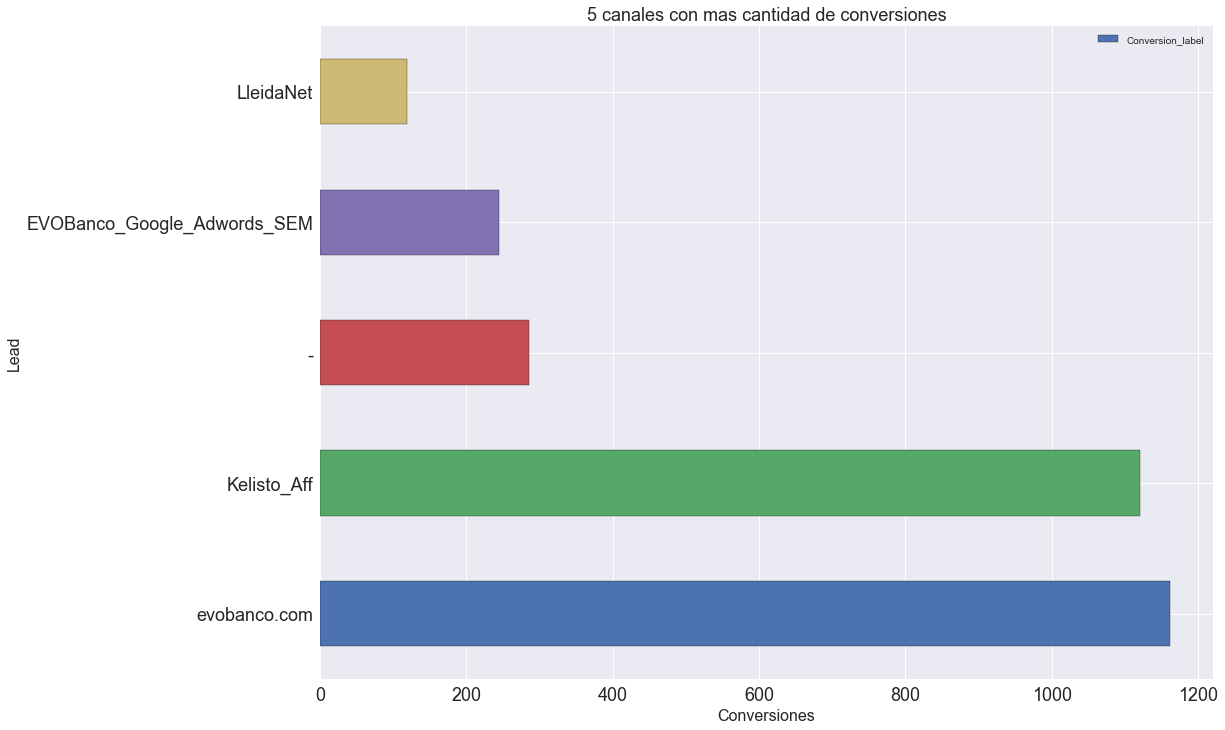

In [172]:
df = pd.DataFrame(data=conv)

l = df.plot.barh(x='Site_Offer', y='Conversion_label',fontsize = 18, figsize=(16, 12), edgecolor='k')

plt.title('5 canales con mas cantidad de conversiones', fontsize = 18)
plt.ylabel('Lead', fontsize = 16)
plt.xlabel('Conversiones', fontsize = 16)

Sigue teniendo mayor conversión evobanco seguido de Kelisto_Aff